Query Options
============

This notebook is just to help set up a list of query templates to see the performance impact of various features and options. Actual performance analysis will be in other notebooks.

- Current 'full' query (FULL)
- Query with OA filter set properly (FIX_OA) (See [this issue](https://github.com/ukwa/ukwa-ui/issues/249))
- Query only using the minimal facets actually required by the UI.
- Query with 
- Query with [facet threads > 0](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.threadsParameter) so the facet work in multithreaded and see if that helps.
- Query with [facet exists](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.existsParameter) so we only check a facet is present, and don't bother counting the number of documents.
- Query with [facet method enum](https://lucene.apache.org/solr/guide/6_6/faceting.html#Faceting-Thefacet.methodParameter) for low-cardinality facets (public_suffix, content_type_norm).
- Adding grouping-by-URL (GROUP_URL)


In [ ]:
# Collections to trial:
c = {}
c['fc2015r'] = {
    'endpoint': "http://solr.api.wa.bl.uk/solr/NPLD-FC2015-20191108-raid6"
}
c['fc2015j'] = {
    'endpoint': "http://solr.api.wa.bl.uk/solr/NPLD-FC2015-20191108-jbod"
}
c['fc2013'] = {
    'endpoint': "http://solr.api.wa.bl.uk/solr/NPLD-FC2013-20190220"
}
c['dc2015'] = {
    'endpoint': "http://solr.api.wa.bl.uk/solr/NPLD-DC2015-20190311"
}


In [180]:
q = {}

# The base query used by UKWA-UI 1.2.8, when 'Accessible In Reading Rooms' is selected (not just OA)
q['baseline'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%7B%21tag%3DfilterFirstLayer%7Daccess_terms%3A%5B%27%27+TO+*%5D&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=host&\
facet.field=domain&\
facet.field=collection&\
facet.field=content_type_norm&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# Same, but taking out the no-op access_terms fq bit:
q['no_no_op'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=host&\
facet.field=domain&\
facet.field=collection&\
facet.field=content_type_norm&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As no_no_op, but dropping fields that appear not to contribute to the search results:
q['min_fields'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
fl=url,title&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"


# As no_no_op, but dropping facets that appear not to contribute to the search results:
q['min_facets'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As min_facets, but dropping some facets, e.g those of high-cardinality (domain, public_suffix surprisingly):
q['sub_min_facets'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=type&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# Min facet right down to one facet:
q['min_facet_public_suffix'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
wt=json&\
version=2.2"

q['min_facet_type'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=type&\
wt=json&\
version=2.2"

q['min_facet_domain'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=domain&\
wt=json&\
version=2.2"

q['min_facet_collection'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=collection&\
wt=json&\
version=2.2"

q['min_facet_access_terms'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=access_terms&\
wt=json&\
version=2.2"

q['min_facet_qualified_access_terms'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As no_no_op, but no facets:
q['no_facets'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
wt=json&\
version=2.2"

# As min_facets, but using a facet limit of 10 instead of the default of 100:
q['min_facets_10'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.limit=10&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As min_facets, but enable grouping by URL
q['group_by_url'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
group=true&\
group.field=url&\
group.main=true&\
wt=json&indent=true&\
version=2.2"

# As min_facets, but enable grouping by URL and only return 10 results
q['group_by_url_10'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=10&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
group=true&\
group.field=url&\
group.main=true&\
wt=json&indent=true&\
version=2.2"

# As group_by_url, but no facets:
q['group_by_url, no_facets'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
group=true&\
group.field=url&\
group.main=true&\
wt=json&\
version=2.2"

# As min_facets, no highlighting
q['no_hl'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
facet=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&indent=true&\
version=2.2"

# As min_facets, but use multiple threads for faceting:
q['facet_threads'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.threads=8&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"

# As min_facets, but only checking if the type facets are present rather than counting the number of documents with each facet value
q['facets_exist'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.type.exists=true&\
facet.field=public_suffix&\
facet.field=type&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
version=2.2"


# As min_facets, but use different facet counting method for low-cardinality fields:
# This turns out to be uniformly terrible!
q['facet_some_enum'] = "{}/select?q={}&\
defType=edismax&\
start=0&rows=50&\
sort=score+desc&\
qf=text&\
pf=text&\
fq=%28type%3A%22Web+Page%22%29&\
hl=true&hl.fl=content&\
facet=true&\
facet.field=public_suffix&\
f.public_suffix.facet.method=enum&\
facet.field=type&\
f.type.facet.method=enum&\
facet.field=domain&\
facet.field=collection&\
facet.field=%7B%21ex%3DfilterSecondLayer%2CfilterFirstLayer%7Daccess_terms&\
wt=json&\
f.access_terms.facet.method=enum&\
version=2.2"


import requests
import json
import random
import pandas as pd

# Prevent web proxies from interfering:
proxies = {
  "http": None,
  "https": None,
}


def run_queries(endpoint):

    print("BEGIN")

    q_type = []
    q_hits = []
    q_time = []

    for i in range(1,25):
        search_terms = ['jackson', 'hats', 'lozenge', 'foul', 'fowl', 'concrete', 'laugh', 'trampoline', 'earnest', 'pop', 
                        'apple', 'gum', 'trip', 'past', 'disastrous', 'fat', 'subsequent', 'wandering', 
                        'finger', 'squeeze', 'shock', 'stomach', 'peaceful', 'fax', 'scrub', 'stir', 'selection', 
                        'ragged', 'curtain', 'tested', 'satisfying', 'imported', 'dusty', 'silent', 'request', 
                        'hydrant', 'steam', 'phone', 'slow', 'political', 'word', 'change', 'soda', 'wall', 'testy', 
                        'petite', 'ice', 'abhorrent', 'drawer', 'parcel', 'prefer', 'twist', 'back', 'meek', 'account', 
                        'fence', 'underwear', 'report', 'faithful', 'visit', 'box', 'ethereal', 'scrape', 'productive']
        random.shuffle(search_terms)
        for key in q:
            #
            search_term = search_terms.pop()
            #
            r = requests.get(q[key].format(endpoint, search_term), proxies=proxies)
            results = json.loads(r.text)
            if r.status_code == 200:
                hits = results.get('response',{}).get('numFound',None)
                if hits is None:
                    #print(r.text)
                    hits = results['grouped']['url']['matches']
                print(search_term, key, r.status_code, r.elapsed.total_seconds(), hits)
                # Store
                if hits > 0:
                    q_type.append(key)
                    q_hits.append(hits)
                    q_time.append(r.elapsed.total_seconds())
            else:
                print(r.text)
                
    print("DONE")
    
    q_data = {
        'type': q_type,
        'hits': q_hits,
        'time': q_time
    }

    return pd.DataFrame(q_data)

cid = 'fc2015r'

c[cid]['results'] = run_queries(c[cid]['endpoint']) 


BEGIN
report baseline 200 0.451113 0
meek no_no_op 200 0.858063 361894
selection min_fields 200 0.414847 8016142
testy min_facets 200 0.285277 35003
steam sub_min_facets 200 0.196093 2027978
abhorrent min_facet_public_suffix 200 0.115052 194387
trip min_facet_type 200 0.386124 12305960
concrete min_facet_domain 200 0.136182 1413938
squeeze min_facet_collection 200 0.115199 1577720
subsequent min_facet_access_terms 200 0.132189 1642955
slow min_facet_qualified_access_terms 200 0.144128 5904791
dusty no_facets 200 0.102157 305226
scrape min_facets_10 200 0.123124 272823
past group_by_url 200 3.949624 57419952
curtain group_by_url_10 200 0.430394 1925752
prefer group_by_url, no_facets 200 0.446374 4056276
jackson no_hl 200 0.263035 3591992
lozenge facet_threads 200 0.189615 20256
satisfying facets_exist 200 0.225518 946409
ragged facet_some_enum 200 7.142286 220572
twist baseline 200 0.057049 0
tested no_no_op 200 0.381321 3757688
fence min_fields 200 0.216964 1513921
petite min_facets 20

scrape no_facets 200 0.06745 272823
wandering min_facets_10 200 0.174126 510763
finger group_by_url 200 0.464307 2121450
trip group_by_url_10 200 1.051273 12305960
satisfying group_by_url, no_facets 200 0.268162 946409
wall no_hl 200 0.659219 17486985
report facet_threads 200 0.969348 56298338
stomach facets_exist 200 0.261424 2377044
prefer facet_some_enum 200 7.045154 4056276
stomach baseline 200 0.047575 0
parcel no_no_op 200 0.312563 898254
silent min_fields 200 0.295811 2441994
imported min_facets 200 0.34492 932567
finger sub_min_facets 200 0.1774 2121450
request min_facet_public_suffix 200 0.435089 18443948
ice min_facet_type 200 0.310643 10603287
productive min_facet_domain 200 0.101281 957746
dusty min_facet_collection 200 0.105086 305226
hats min_facet_access_terms 200 0.112706 1310030
fence min_facet_qualified_access_terms 200 0.128242 1513921
phone no_facets 200 0.089339 53230170
soda min_facets_10 200 0.1403 277464
curtain group_by_url 200 0.506946 1925752
squeeze group_by

back baseline 200 0.786591 0
underwear no_no_op 200 0.279243 1984235
visit min_fields 200 2.452142 92471022
account min_facets 200 2.357702 76705369
fat sub_min_facets 200 0.194814 4358174
scrub min_facet_public_suffix 200 0.113318 376373
trampoline min_facet_type 200 0.115815 351132
finger min_facet_domain 200 0.139719 2121450
ethereal min_facet_collection 200 0.098154 279902
past min_facet_access_terms 200 0.559107 57419952
slow min_facet_qualified_access_terms 200 0.134188 5904791
meek no_facets 200 0.10077 361894
dusty min_facets_10 200 0.335933 305226
squeeze group_by_url 200 0.415395 1577720
imported group_by_url_10 200 0.424627 932567
apple group_by_url, no_facets 200 0.490107 7655655
hats no_hl 200 0.207711 1310030
lozenge facet_threads 200 0.185721 20256
fax facets_exist 200 0.558936 9897979
box facet_some_enum 200 7.541978 18691613
faithful baseline 200 0.04956 0
fat no_no_op 200 0.3889 4358174
drawer min_fields 200 0.150353 643941
satisfying min_facets 200 0.268037 946409
ba

We can now plot the results...

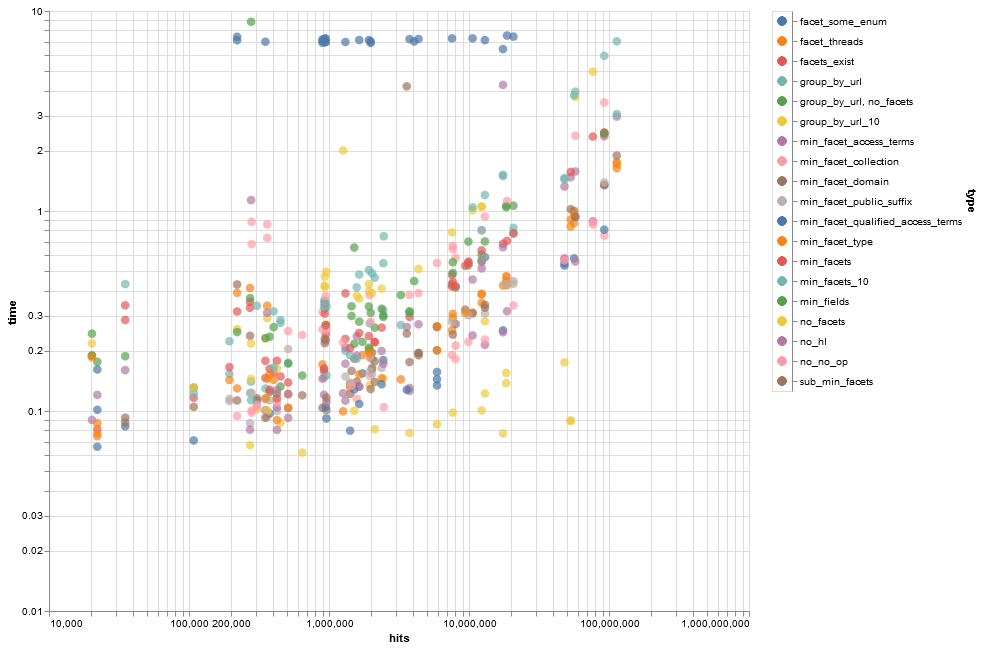

In [181]:
#!pip install altair vega
import altair as alt
alt.renderers.enable('notebook')

def make_plot(df):
    # Based on https://altair-viz.github.io/user_guide/interactions.html#selection-targets-fields-and-encodings
    color = alt.condition(selection,
                          alt.Color('type:N', legend=None),
                          alt.value('lightgray'))

    scatter = alt.Chart(df).mark_circle(size=75).encode(
        alt.X('hits', scale=alt.Scale(type='log', base=10)),
        alt.Y('time', scale=alt.Scale(type='log', base=10)),
        color=color,
        tooltip=['type', 'hits', 'time']
    ).properties(
        width=700,
        height=600
    ).add_selection(
        selection
    )

    legend = alt.Chart(df).mark_circle(size=75).encode(
        y=alt.Y('type', axis=alt.Axis(orient='right')),
        color=color
    ).add_selection(
        selection
    )

    return scatter | legend



#c['fc2015r']['results'] = df_fc2015r
#

make_plot(c[cid]['results'])

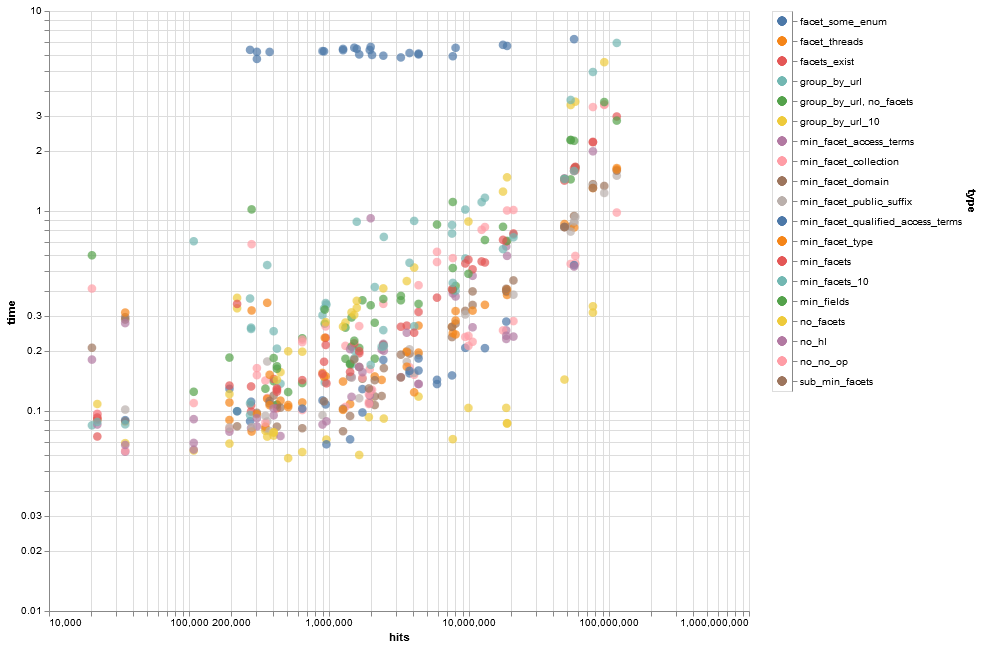

In [179]:
c['fc2015j']['results'] = df_fc2015j
make_plot(c['fc2015j']['results'])

In [ ]:
make_plot(c['fc2015r']['results'])

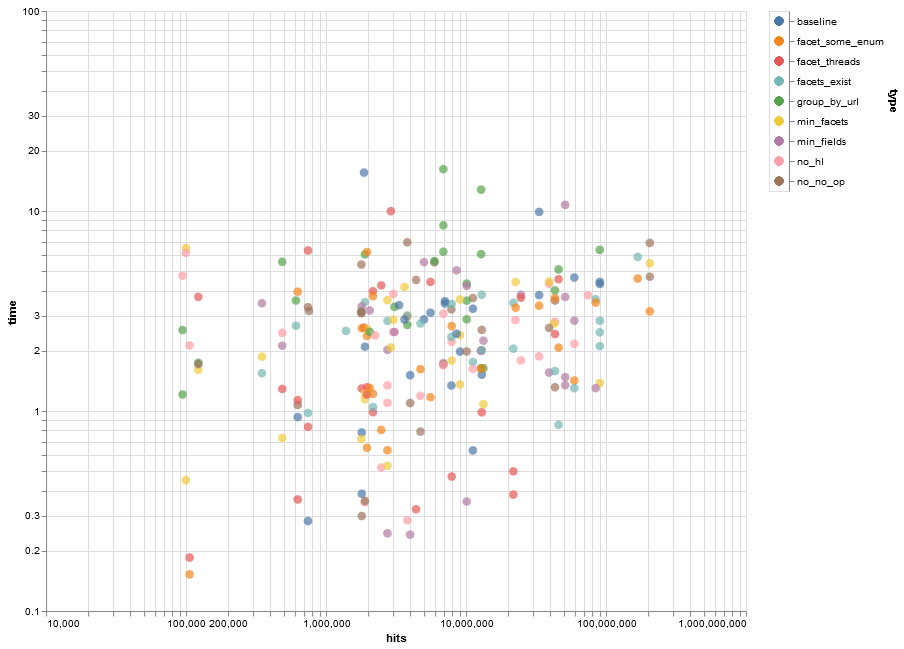

In [125]:
make_plot(df_dc2015)

In [174]:
make_plot(c['dc2015']['results'])

KeyError: 'results'